<a href="https://colab.research.google.com/github/danaemolinafeyt-web/HabitOrbit/blob/main/HabitOrbit_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      date exercise study wake_early meditate      notes
0  8/23/25        N     Y          N        Y  slept in 
1  8/24/25        Y     Y          Y        N   Success!
2  8/25/25        Y     Y          Y        Y   All Yes!
3  8/26/25        N     Y          N        Y        NaN
4  8/27/25        Y     Y          N        Y        NaN


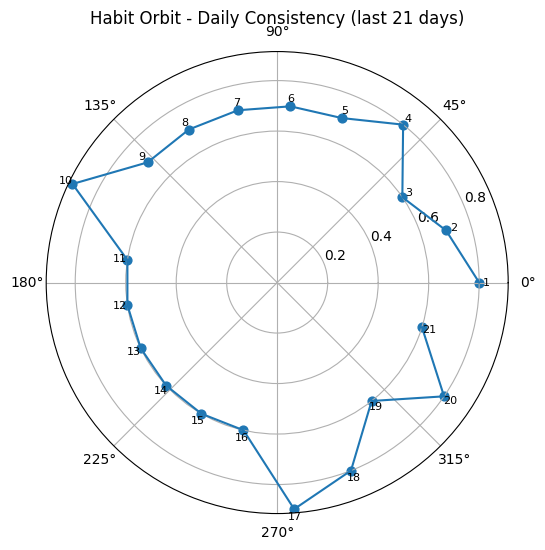

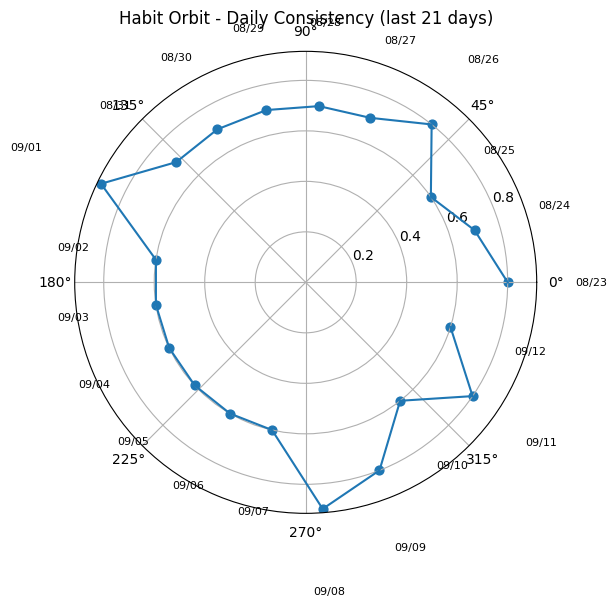

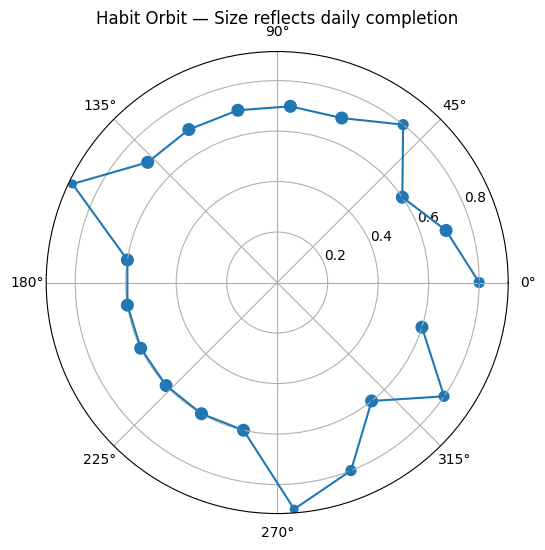

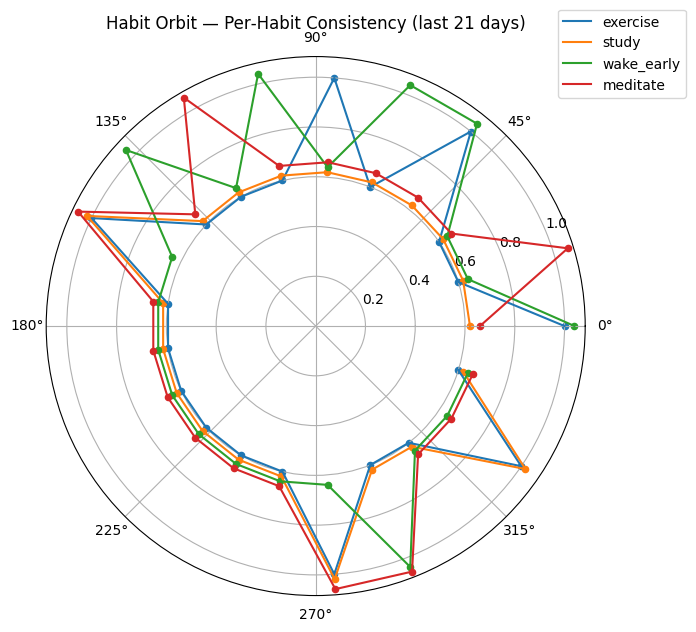

In [24]:
#this is how we would import the document to google colab.
from google.colab import drive
drive.mount('/content/drive') #drive mount is the virtual machine in which now houses my files.

data_path = "/content/drive/MyDrive/ HabitOrbit /habit_orbit_data - Sheet1 (4).csv" #this data_path is what i will use to refrecen my data later in the code.
save_dir = "/content/drive/MyDrive/HabitOrbit"

import pandas as pd #data analysis library
import numpy as np #numerical operations.
import matplotlib.pyplot as plt #plotting library.
import os #my utilities

df = pd.read_csv(data_path) #this is what causes our data to be read, specifically the pd.read_csv (data_path)
# df is a data frame and it is how we will have the data show up, with rows and columns, and headers.


#required is telling python, hey these are the columns that exist.
required = ["date", "exercise", "study", "wake_early", "meditate"]
missing = [habit for habit in required if habit not in df.columns] #this is a list comperhension compact loop.
#says look at each column, required, if that col is not found in df.columns include in missing.
if missing:
    raise ValueError(f"missing columns: {missing}")
habit_cols = ["data", "exercise", "study", "wake_early", "meditate"]

print(df.head())

def to_binary(x): #define a function (reusable code block). to_binary = name of function, you can call it whatever, this converts to binary.
    #(x) this is the input parameter. whatever value we pass in y or 0 will be stored in variable x inside the function.
    #think input= x ->machine logic -> output (1 or 0)
    x_str = str(x).strip().lower()#str(x)input to string, so it wont break. .strip()remove extra spaces. .lower()->makes all things lowercase.
    if x in [1, "1"]: #this checks the first condition. x in [1, "1"]means: is the raw input the number or string?
        return 1
    elif x_str in ["y", "yes", "done", "true"]:#if the condition above is not met we move to elif, so if your input was y, yes, done etc.
        return 1
    else: #this is the default, so if none of the above conditions have met we will then move to not done. and return a 0.
        return 0
habit_cols = ["exercise", "study", "wake_early", "meditate"]#this is who we want to apply the confitions to.

for col in habit_cols: #this controls the above loop.
    df[col] = df[col].apply(to_binary).astype(int)

  #we want to keep the recent 21 days
df = df.tail(21).reset_index(drop=True)
#df.tail(21) takes the last 21 rows of our data frame.
#.reset_index(drop=true) resets the rows

#completion ratio (0 = did nothing, 1=did all 4 habits)
df["completion_ratio"] = df[habit_cols].mean(axis=1) #df[habits_cols]this takes only the habit columns..mean(axis=1) calculates the row-wise mean across the habits.
df["day_index"] = np.arange(len(df)) #this code is whats going to help us space the points from the completion ratio.
#.len(df) = number of rows (should be 21)
#np.arange(len(df))=[0,1,2 etc] assigns new columns.


df.head() #shows first 5 rows with two new columns. 1 completion ratio score, and day_index (position number in the circle)

import numpy as np

N = len(df) #this is the number of points on the orbit which should be 21, for my 21 day habit tracker.

df["theta"] = 2 * np.pi * (df["day_index"] / N) #this will evenly space the days around the circle.

#the best part of the code. This is going to map my completion of habits to a radius. So Inner = tight to orbit meaning aI had a perfect day, OUTER = far ring, middes all.
INNER = 0.6
OUTER = 1.0

df["r"] = OUTER - df["completion_ratio"] * (OUTER - INNER)

df[["date", "completion_ratio", "day_index", "theta", "r"]].head()

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')

ax.scatter(df["theta"], df["r"], s=40)
ax.plot(df["theta"], df["r"])

for i, (th, rr) in enumerate(zip(df["theta"], df["r"]), start=1):
    ax.text(th, rr + 0.03, str(i), ha='center', va='center', fontsize=8)

ax.set_title("Habit Orbit - Daily Consistency (last 21 days)", pad=20)
ax.grid(True)
plt.show()

df["date"] = pd.to_datetime(df["date"], format="%m/%d/%y")
df["date_label"] = df["date"].dt.strftime("%m/%d")

plt.figure(figsize=(6,6))
ax= plt.subplot(111, projection='polar')

ax.scatter(df["theta"], df["r"], s=40)
ax.plot(df["theta"], df["r"])

for th, rr, lbl in zip(df["theta"], df["r"], df["date_label"]):
    ax.text(th, rr +0.33, lbl, ha='center', va='center', fontsize = 8)
ax.set_title("Habit Orbit - Daily Consistency (last 21 days)", pad=20)
ax.grid(True)
plt.show()

sizes = []
for cr in df["completion_ratio"]:
    if cr < 0.34: sizes.append(30)
    elif cr < 0.67: sizes.append(50)
    else: sizes.append(70)

plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')

ax.scatter(df["theta"], df["r"], s=sizes)
ax.plot(df["theta"], df["r"])
ax.set_title("Habit Orbit — Size reflects daily completion", pad=20)
ax.grid(True)
plt.show()

# choose a base radius band for "done" vs "missed"
INNER, OUTER = 0.6, 1.0
band = OUTER - INNER

def habit_radius(series):
    # series is 0/1 for a single habit column
    return OUTER - series * band

offsets = {
    "exercise":   -0.00,   # tweak these small offsets if lines overlap
    "study":      +0.02,
    "wake_early": +0.04,
    "meditate":   +0.06,
}

plt.figure(figsize=(7,7))
ax = plt.subplot(111, projection='polar')

for habit, off in offsets.items():
    r_habit = habit_radius(df[habit]) + off
    ax.plot(df["theta"], r_habit, label=habit)   # draw the line
    ax.scatter(df["theta"], r_habit, s=20)       # and points

ax.set_title("Habit Orbit — Per‑Habit Consistency (last 21 days)", pad=20)
ax.grid(True)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.show()